<a href="https://colab.research.google.com/github/ViniciusCastillo/Aprendendo/blob/master/BootcampAlura_Modulo3_Aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv("https://github.com/alura-cursos/Prophet_covid/raw/main/dados_covid_sp.zip", sep=";")
dados["datahora"] = pd.to_datetime(dados["datahora"])
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286178 entries, 0 to 286177
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   nome_munic     286178 non-null  object        
 1   codigo_ibge    286178 non-null  int64         
 2   dia            286178 non-null  int64         
 3   mes            286178 non-null  int64         
 4   datahora       286178 non-null  datetime64[ns]
 5   casos          286178 non-null  int64         
 6   casos_novos    286178 non-null  int64         
 7   casos_pc       286178 non-null  object        
 8   casos_mm7d     286178 non-null  object        
 9   obitos         286178 non-null  int64         
 10  obitos_novos   286178 non-null  int64         
 11  obitos_pc      286178 non-null  object        
 12  obitos_mm7d    286178 non-null  object        
 13  letalidade     286178 non-null  object        
 14  nome_ra        285735 non-null  object        
 15  

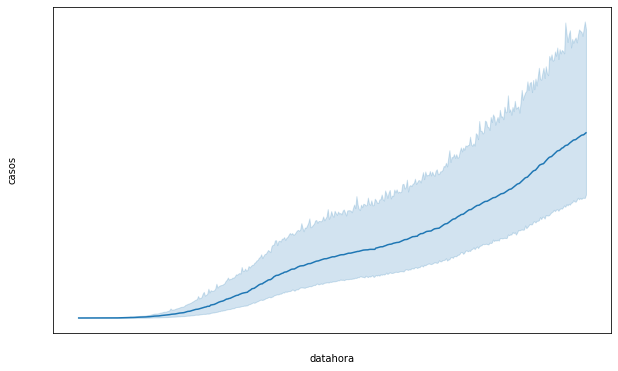

In [3]:
mpl.rcParams["figure.figsize"] =(10,6)
mpl.pyplot.rcParams['ytick.color'] = 'white'
mpl.pyplot.rcParams['xtick.color'] = 'white'
sns.lineplot(x="datahora", y="casos", data=dados)

In [4]:
dados_sp = dados.loc[dados["nome_munic"] == "São Paulo"].copy()
dados_sp.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9


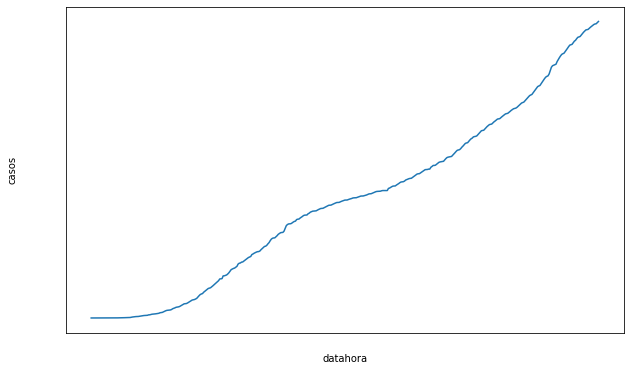

In [5]:
sns.lineplot(x="datahora", y="casos", data=dados_sp)

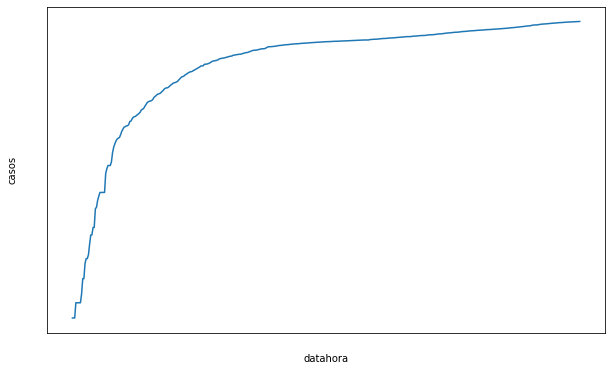

In [6]:
sns.lineplot(x="datahora", y="casos", data=dados_sp)
mpl.pyplot.yscale("log")

In [7]:
dados_sp["taxa_crescimento_casos"] = dados_sp["casos_novos"].diff()
dados_sp["taxa_crescimento_obitos"] = dados_sp["obitos_novos"].diff()

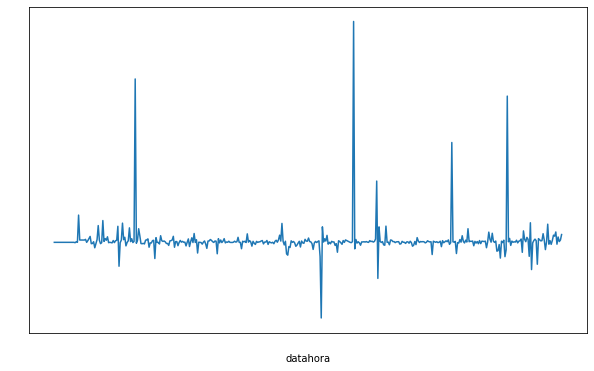

In [8]:
sns.lineplot(x="datahora",y=(dados_sp["taxa_crescimento_obitos"]/dados_sp["taxa_crescimento_casos"]), data=dados_sp)

In [9]:
dados_sp["ano"] = dados_sp["datahora"].dt.year
dados_sp["mes"] = dados_sp["datahora"].dt.month
dados_sp["dia"] = dados_sp["datahora"].dt.day

In [10]:
plotar = dados_sp.query("ano == 2021")

In [11]:
num_linhas = plotar["datahora"].count()
valores=[]
for i in np.arange(1,num_linhas, step=10):
  valores = valores + ["{}/{}".format(plotar["datahora"].dt.day.iloc[i], plotar["datahora"].dt.month.iloc[i])]


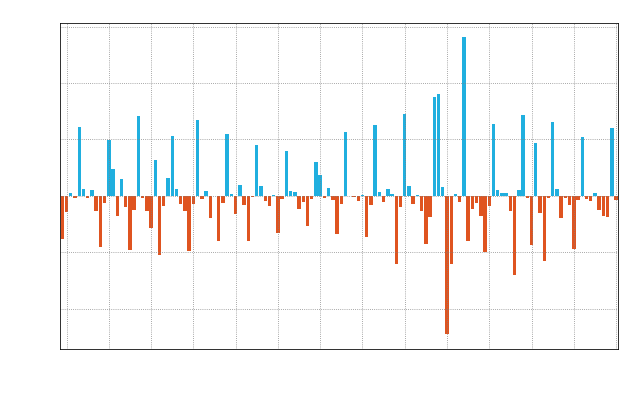

In [12]:
ax = sns.barplot(x="datahora", y ="taxa_crescimento_casos", data=plotar, 
                 palette=(plotar["taxa_crescimento_casos"]>0).map({True: "deepskyblue",
                                                                   False: "orangered"}))
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:,.1f}".format(x/1)))
ylabels = ['{:,.3f}'.format(x) for x in ax.get_yticks()/1000]
ax.set_yticklabels(ylabels)
plt.xticks(np.arange(1,num_linhas, step=10), rotation=45, labels=valores)
plt.xlabel("dia/mês", fontweight="bold", color="white")
plt.ylabel("Crescimento de Casos", fontweight="bold", color="white")
plt.title("Taxa de crescimento da casos de COVID-19 na cidade de São Paulo", fontweight="bold", color="white")
plt.grid(linestyle=":", color="grey")

In [13]:
dados_sp["media_movel_casos"] = dados_sp["casos_novos"].rolling(window=7,center=False).mean()
dados_sp["media_movel_obitos"] = dados_sp["obitos_novos"].rolling(window=7,center=False).mean()

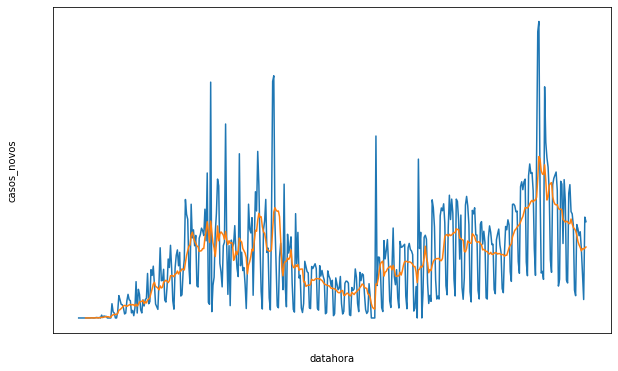

In [14]:
sns.lineplot(data=dados_sp, x="datahora", y="casos_novos")
sns.lineplot(data=dados_sp, x="datahora", y="media_movel_casos")

<BarContainer object of 443 artists>

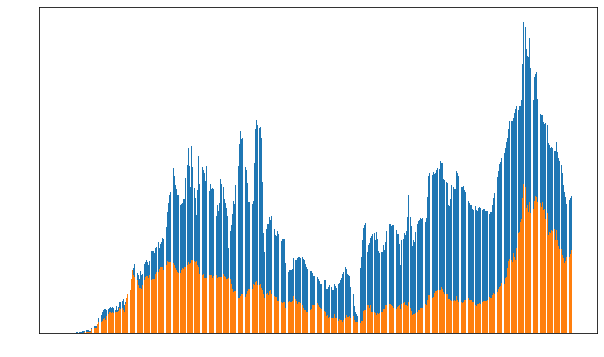

In [15]:
plt.bar(dados_sp["datahora"], dados_sp["media_movel_casos"])
plt.bar(dados_sp["datahora"], dados_sp["media_movel_obitos"]*10)

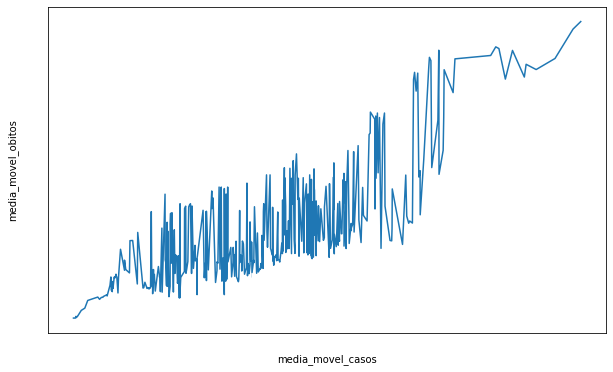

In [16]:
sns.lineplot(x="media_movel_casos",y="media_movel_obitos",data=dados_sp)

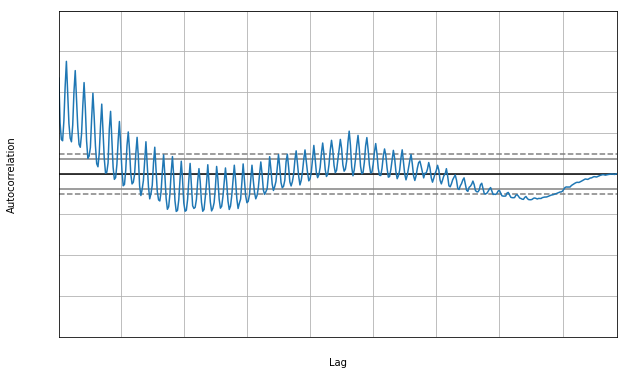

In [17]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dados_sp['casos_novos'])

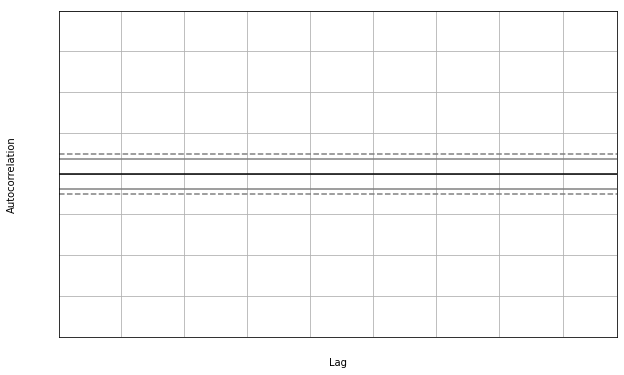

In [18]:
autocorrelation_plot(dados_sp['media_movel_casos'])

In [19]:
print(dados_sp["obitos_novos"].shift(10).tail(10))
print(dados_sp["obitos_novos"].shift(5).tail(10))

279847    231.0
280492    198.0
281137     55.0
281782     29.0
282427    244.0
283072    177.0
283717    160.0
284362    116.0
285007    139.0
285652     23.0
Name: obitos_novos, dtype: float64
279847    177.0
280492    160.0
281137    116.0
281782    139.0
282427     23.0
283072     35.0
283717    178.0
284362    145.0
285007    100.0
285652    143.0
Name: obitos_novos, dtype: float64


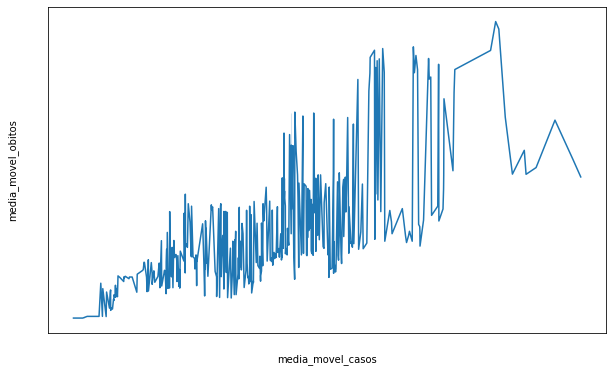

In [20]:
sns.lineplot(x="media_movel_casos",y=dados_sp["media_movel_obitos"].shift(10),data=dados_sp)    

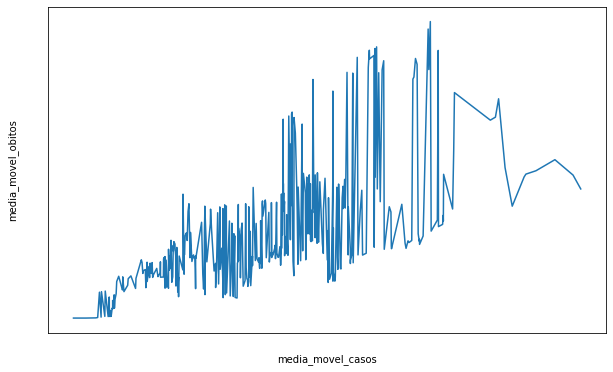

In [21]:
sns.lineplot(x="media_movel_casos",y=dados_sp["media_movel_obitos"].shift(14),data=dados_sp)

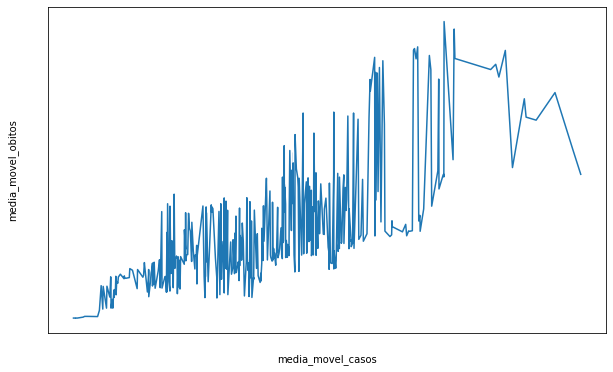

In [22]:
sns.lineplot(x="media_movel_casos",y=dados_sp["media_movel_obitos"].shift(7),data=dados_sp)

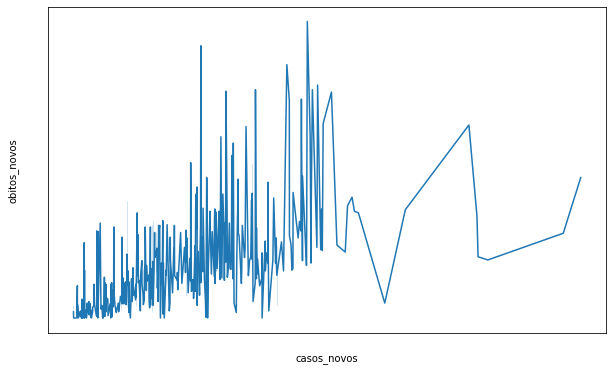

In [23]:
sns.lineplot(x="casos_novos",y=dados_sp["obitos_novos"].shift(14),data=dados_sp)

In [24]:
!pip install --upgrade statsmodels

     |████████████████████████████████| 9.8 MB 8.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [25]:
import statsmodels.api as sm

In [26]:
correlCruzada = sm.tsa.stattools.ccf(dados_sp["casos_novos"], dados_sp["obitos_novos"], adjusted=False)


cores=[]
for x in correlCruzada:
  if x > 0:
    cores = cores + ["blue"]
  else:
    cores = cores + ["red"]

itens=np.arange(0,len(correlCruzada),1)
valores=[]
for i in np.arange(0,len(correlCruzada),40):
  valores = valores + [itens[i]]

valores


[0, 40, 80, 120, 160, 200, 240, 280, 320, 360, 400, 440]

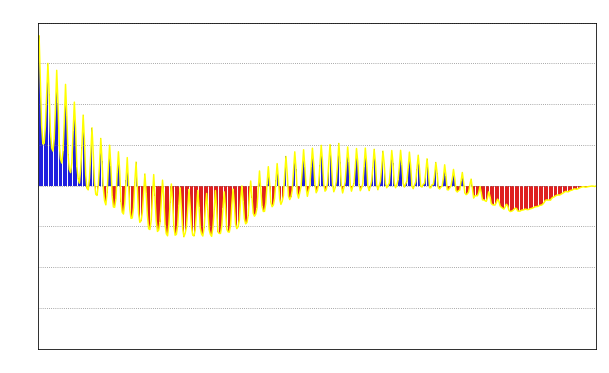

In [27]:
sns.lineplot(x=itens, y=correlCruzada, color="yellow")
sns.barplot(x=itens, y=correlCruzada, palette=cores)
plt.yticks(np.arange(-.8,1,0.2))
plt.xticks(ticks=np.arange(0,len(correlCruzada),40), labels=valores)
plt.title("Correlação cruzada entre novos casos e novos óbitos", fontweight="bold", color="white")
plt.grid(linestyle=":", color="grey", axis="y")

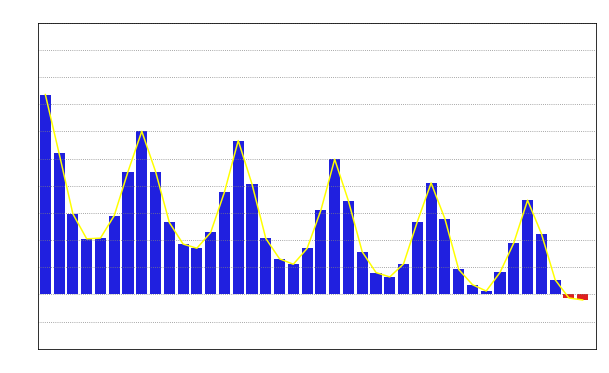

In [28]:
sns.lineplot(x=itens[0:40], y=correlCruzada[0:40], color="yellow")
sns.barplot(x=itens[0:40], y=correlCruzada[0:40], palette=cores)
plt.yticks(np.arange(-.2,1.1,0.1))
plt.xticks(ticks=np.arange(0,41,4), labels=np.arange(0,41,4))
plt.title("Correlação cruzada entre novos casos e novos óbitos", fontweight="bold", color="white")
plt.grid(linestyle=":", color="grey", axis="y")

In [29]:
from fbprophet import Prophet

In [30]:
df = pd.DataFrame()
df['ds'] = dados_sp['datahora']
df['y'] = dados_sp['casos_novos']
df.head()

,ds,y
562,2020-02-25,0
1207,2020-02-26,0
1852,2020-02-27,0
2497,2020-02-28,1
3142,2020-02-29,0


In [31]:
modelo = Prophet()
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
dataframefuturo = modelo.make_future_dataframe(periods=30)
previsao = modelo.predict(dataframefuturo)
previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-114.303728,-792.935295,1589.174112,-114.303728,-114.303728,500.316952,500.316952,500.316952,500.316952,500.316952,500.316952,0.0,0.0,0.0,386.013224
1,2020-02-26,-96.932780,-695.564048,1723.005378,-96.932780,-96.932780,554.767711,554.767711,554.767711,554.767711,554.767711,554.767711,0.0,0.0,0.0,457.834930
2,2020-02-27,-79.561833,-630.540196,1774.791001,-79.561833,-79.561833,650.710000,650.710000,650.710000,650.710000,650.710000,650.710000,0.0,0.0,0.0,571.148167
3,2020-02-28,-62.190885,-931.024441,1500.994793,-62.190885,-62.190885,368.442066,368.442066,368.442066,368.442066,368.442066,368.442066,0.0,0.0,0.0,306.251181
4,2020-02-29,-44.819937,-1119.862723,1205.606207,-44.819937,-44.819937,30.824737,30.824737,30.824737,30.824737,30.824737,30.824737,0.0,0.0,0.0,-13.995200


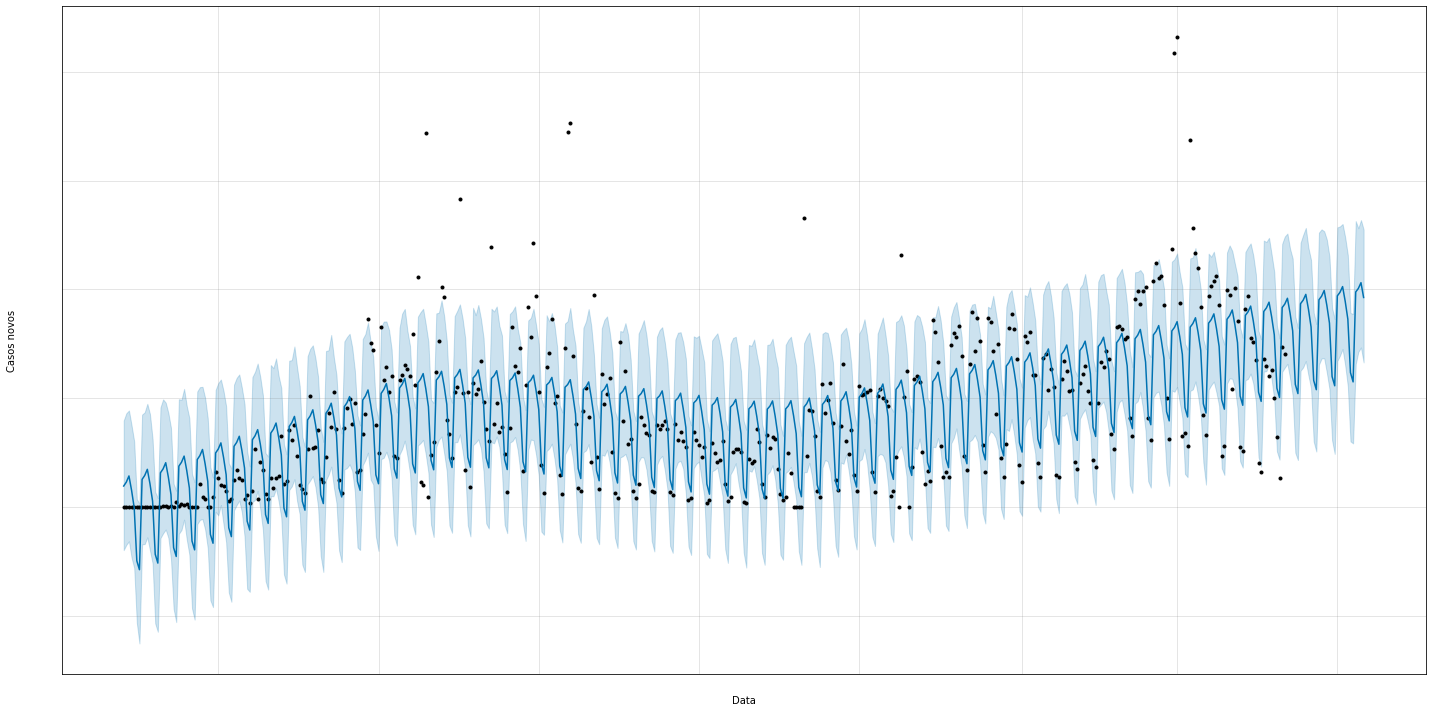

In [33]:
fig = modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(20,10))

In [34]:
dados_teste = pd.DataFrame()
dados_teste['ds'] = dados_sp.datahora[400:]
dados_teste['y'] = dados_sp.casos_novos[400:]
print(len(dados_teste))
dados_teste.head()

43


,ds,y
258562,2021-03-31,8348
259207,2021-04-01,8646
259852,2021-04-02,3743
260497,2021-04-03,1311
261142,2021-04-04,1359


In [35]:
df = pd.DataFrame()
df['ds'] = dados_sp.datahora[:400]
df['y'] = dados_sp.casos_novos[:400]
df.head()

,ds,y
562,2020-02-25,0
1207,2020-02-26,0
1852,2020-02-27,0
2497,2020-02-28,1
3142,2020-02-29,0


In [36]:
modelo = Prophet()
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=len(dados_teste))
previsao = modelo.predict(dataframefuturo)
previsao.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-137.621348,-726.898282,1479.096355,-137.621348,-137.621348,457.699352,457.699352,457.699352,457.699352,457.699352,457.699352,0.0,0.0,0.0,320.078004
1,2020-02-26,-119.843618,-730.056847,1408.773037,-119.843618,-119.843618,456.859942,456.859942,456.859942,456.859942,456.859942,456.859942,0.0,0.0,0.0,337.016324
2,2020-02-27,-102.065887,-517.695305,1643.050247,-102.065887,-102.065887,596.079908,596.079908,596.079908,596.079908,596.079908,596.079908,0.0,0.0,0.0,494.014021
3,2020-02-28,-84.288157,-856.579802,1337.540240,-84.288157,-84.288157,340.781628,340.781628,340.781628,340.781628,340.781628,340.781628,0.0,0.0,0.0,256.493471
4,2020-02-29,-66.510426,-1148.522976,1057.120643,-66.510426,-66.510426,59.114795,59.114795,59.114795,59.114795,59.114795,59.114795,0.0,0.0,0.0,-7.395631


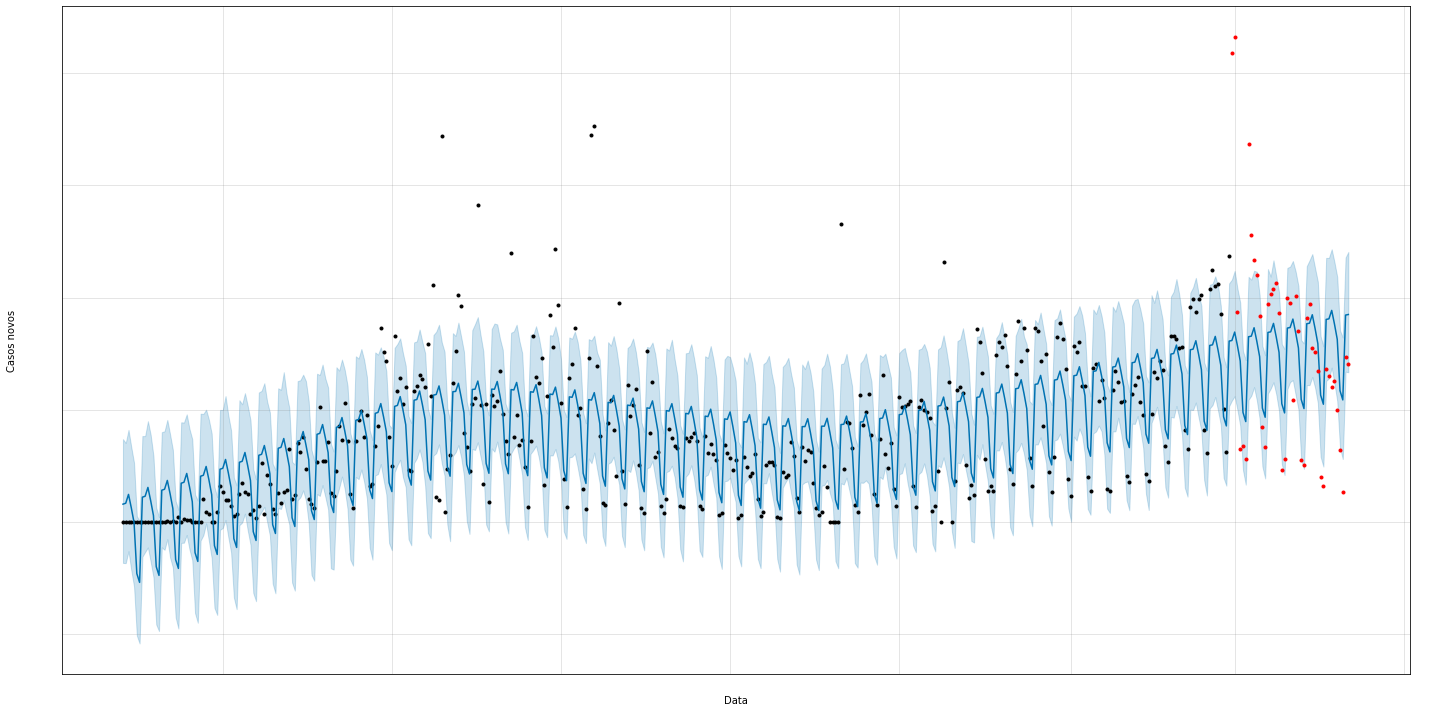

In [37]:
fig = modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(20,10))
plt.plot(dados_teste.ds, dados_teste.y, '.r')

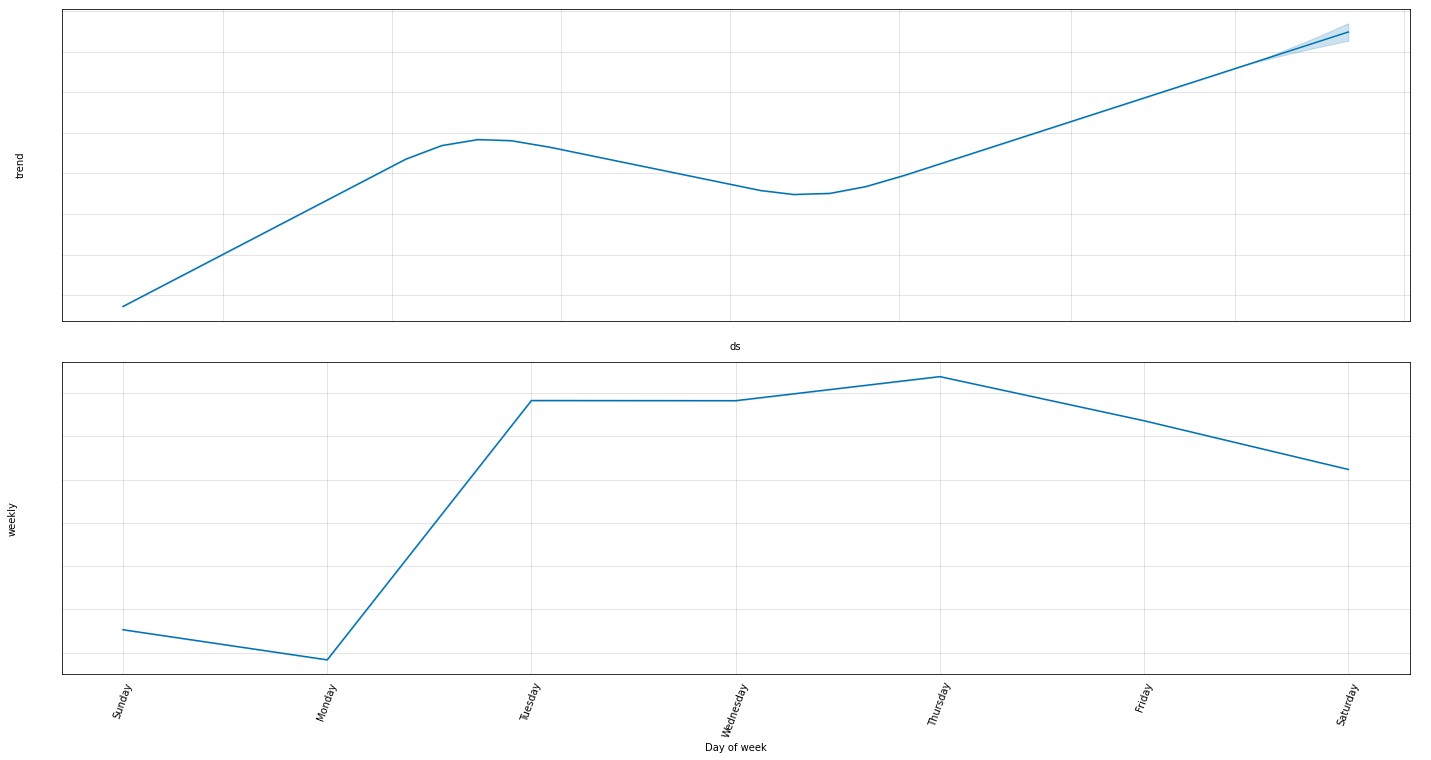

In [38]:
modelo.plot_components(previsao, figsize=(20,10))
plt.xticks(rotation='70', color='black'); #olhar rotação

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


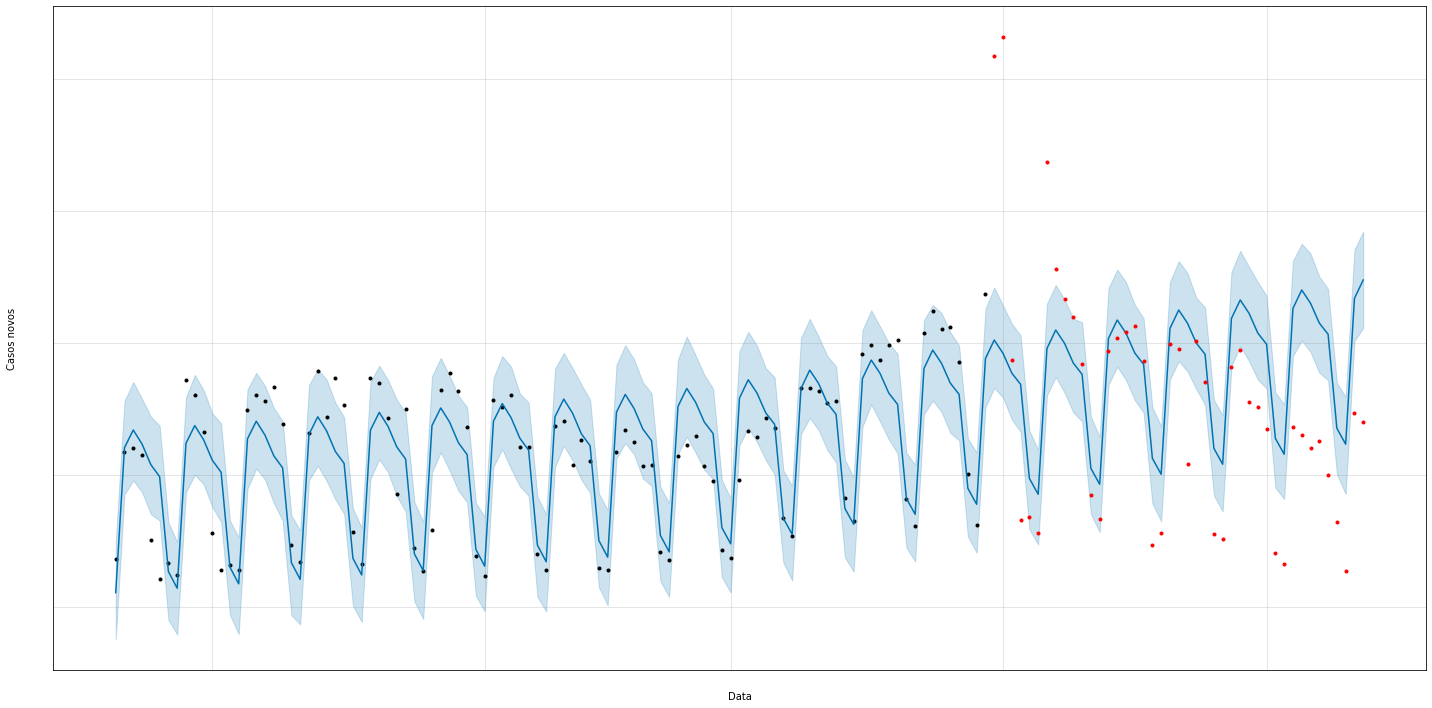

In [39]:
df = pd.DataFrame()
df['ds'] = dados_sp.datahora[300:400]
df['y'] = dados_sp.casos_novos[300:400]
modelo = Prophet()
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=len(dados_teste))
previsao = modelo.predict(dataframefuturo)
previsao.head()
fig = modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(20,10))
plt.plot(dados_teste.ds, dados_teste.y, '.r')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


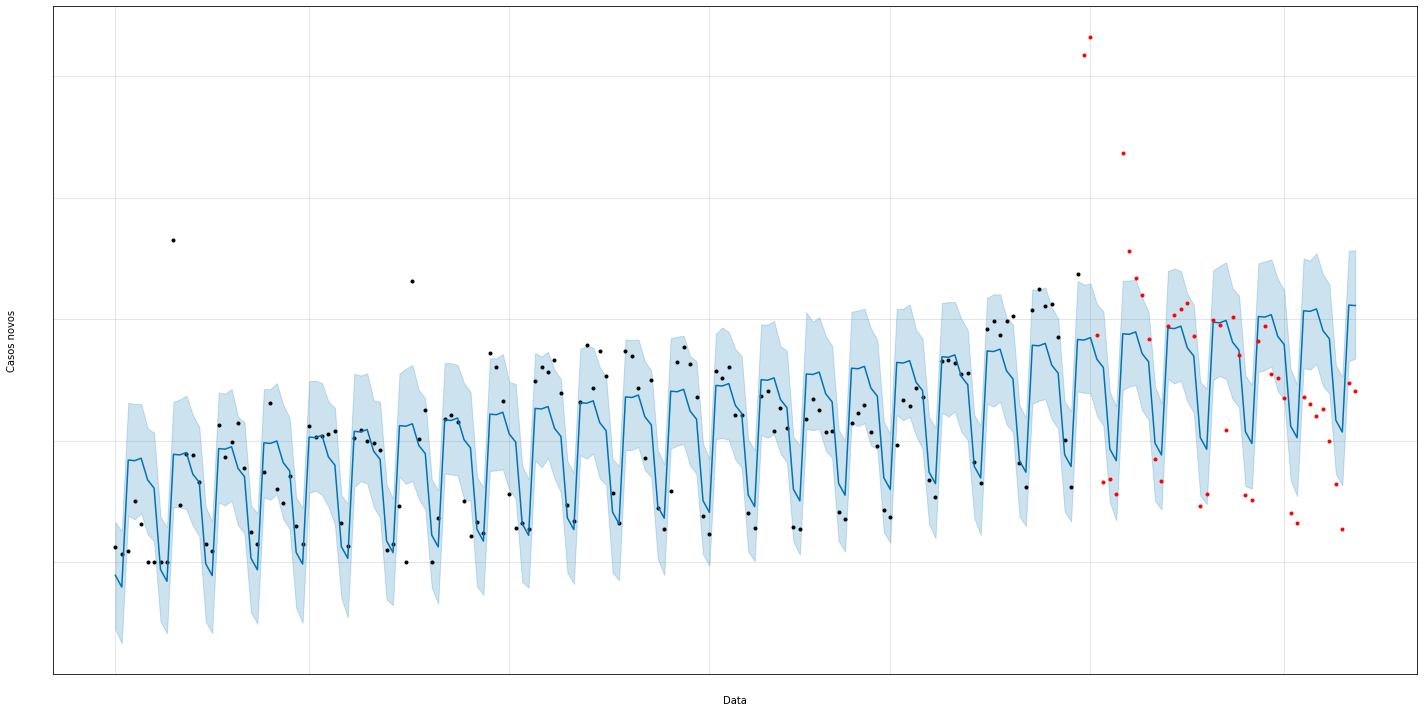

In [40]:
df = pd.DataFrame()
df['ds'] = dados_sp.datahora[250:400]
df['y'] = dados_sp.casos_novos[250:400]
modelo = Prophet()
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=len(dados_teste))
previsao = modelo.predict(dataframefuturo)
previsao.head()
fig = modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(20,10))
plt.plot(dados_teste.ds, dados_teste.y, '.r')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


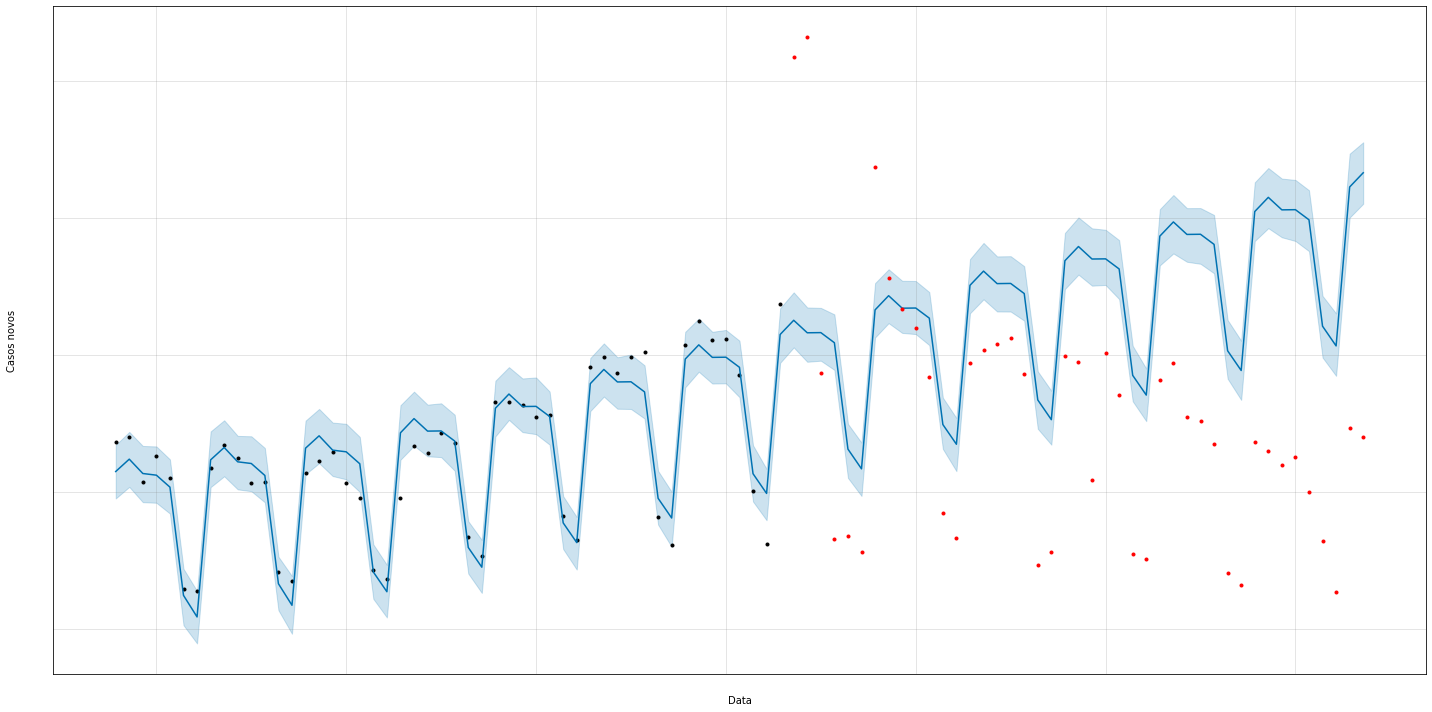

In [41]:
df = pd.DataFrame()
df['ds'] = dados_sp.datahora[350:400]
df['y'] = dados_sp.casos_novos[350:400]
modelo = Prophet()
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=len(dados_teste))
previsao = modelo.predict(dataframefuturo)
previsao.head()
fig = modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(20,10))
plt.plot(dados_teste.ds, dados_teste.y, '.r')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


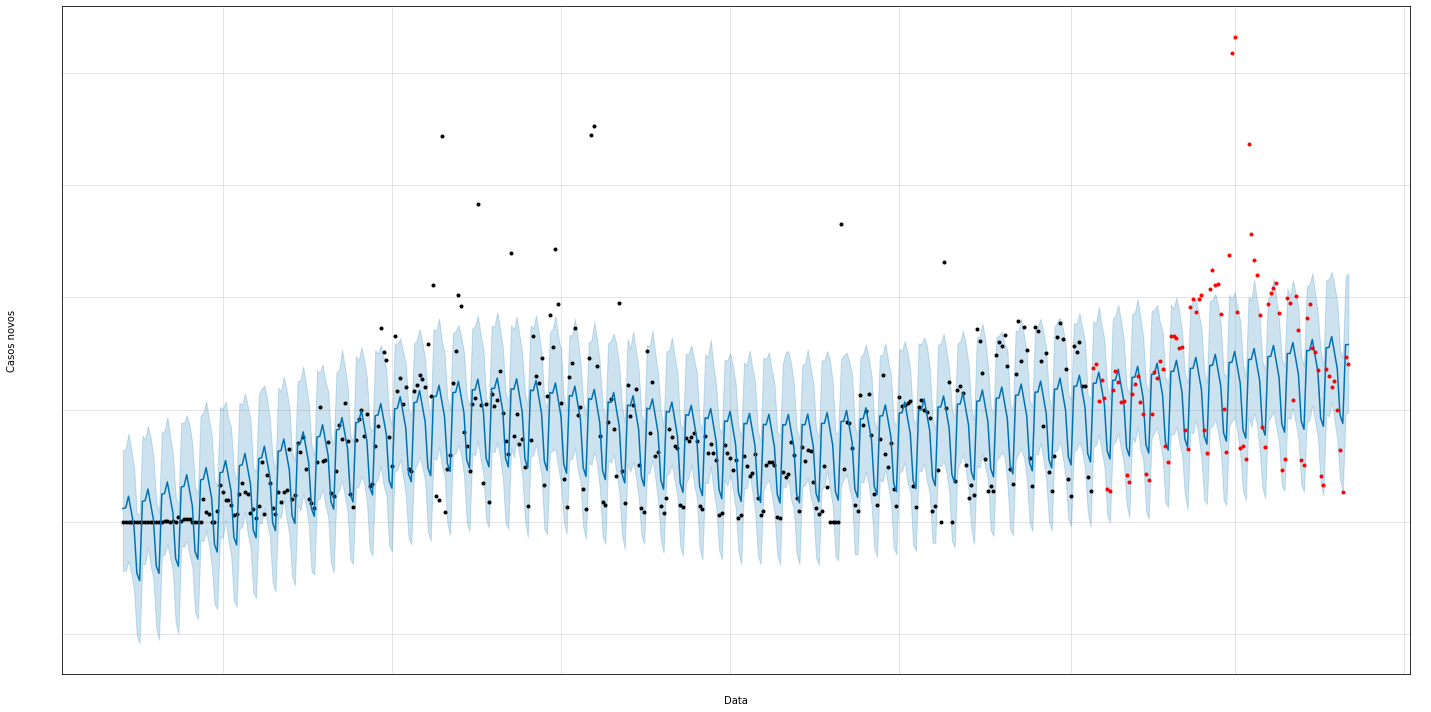

In [42]:
dados_teste = pd.DataFrame()
dados_teste['ds'] = dados_sp.datahora[350:]
dados_teste['y'] = dados_sp.casos_novos[350:]
df = pd.DataFrame()
df['ds'] = dados_sp.datahora[:350]
df['y'] = dados_sp.casos_novos[:350]
modelo = Prophet()
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=len(dados_teste))
previsao = modelo.predict(dataframefuturo)
previsao.head()
fig = modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(20,10))
plt.plot(dados_teste.ds, dados_teste.y, '.r')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


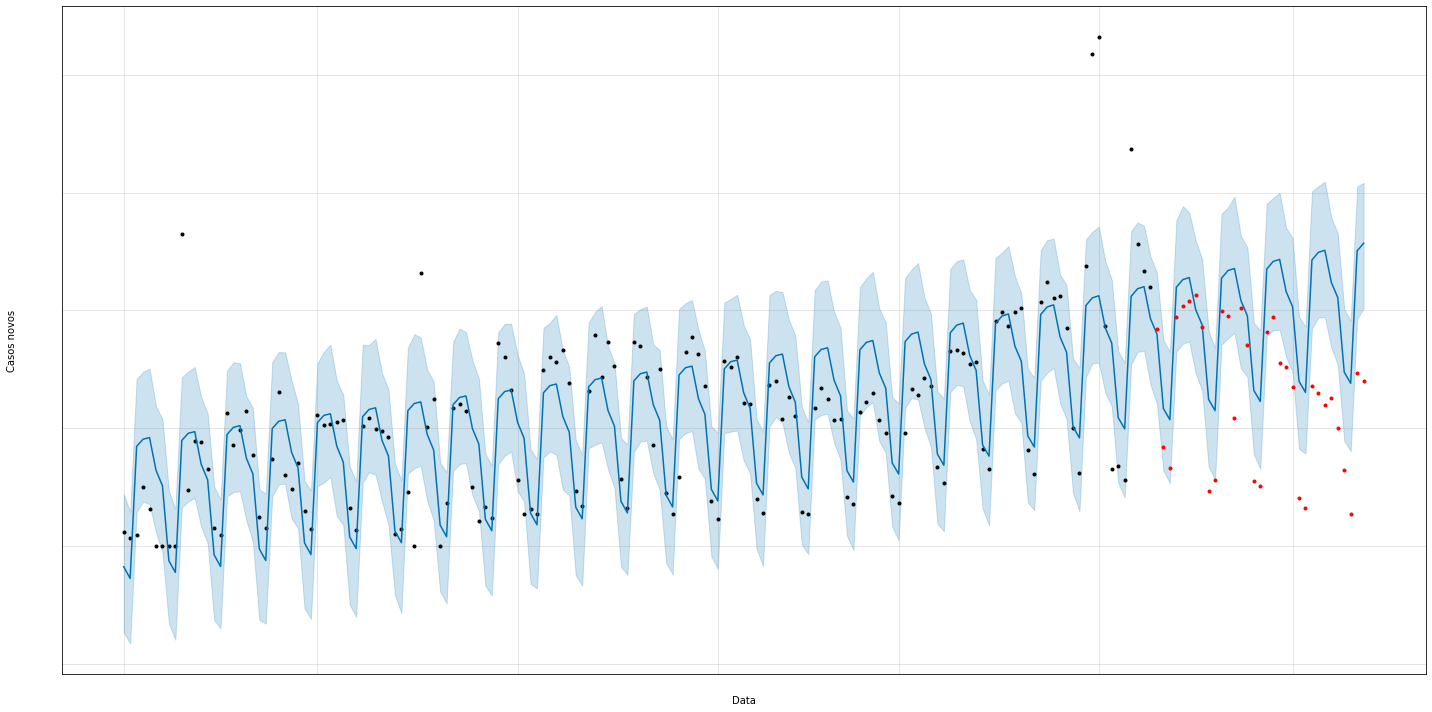

In [43]:
dados_teste = pd.DataFrame()
dados_teste['ds'] = dados_sp.datahora[410:]
dados_teste['y'] = dados_sp.casos_novos[410:]
df = pd.DataFrame()
df['ds'] = dados_sp.datahora[250:410]
df['y'] = dados_sp.casos_novos[250:410]
modelo = Prophet()
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=len(dados_teste))
previsao = modelo.predict(dataframefuturo)
previsao.head()
fig = modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(20,10))
plt.plot(dados_teste.ds, dados_teste.y, '.r')

In [44]:
dados_teste = pd.DataFrame()
dados_teste['ds'] = dados_sp.datahora[400:]
dados_teste['y'] = dados_sp.casos[400:]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


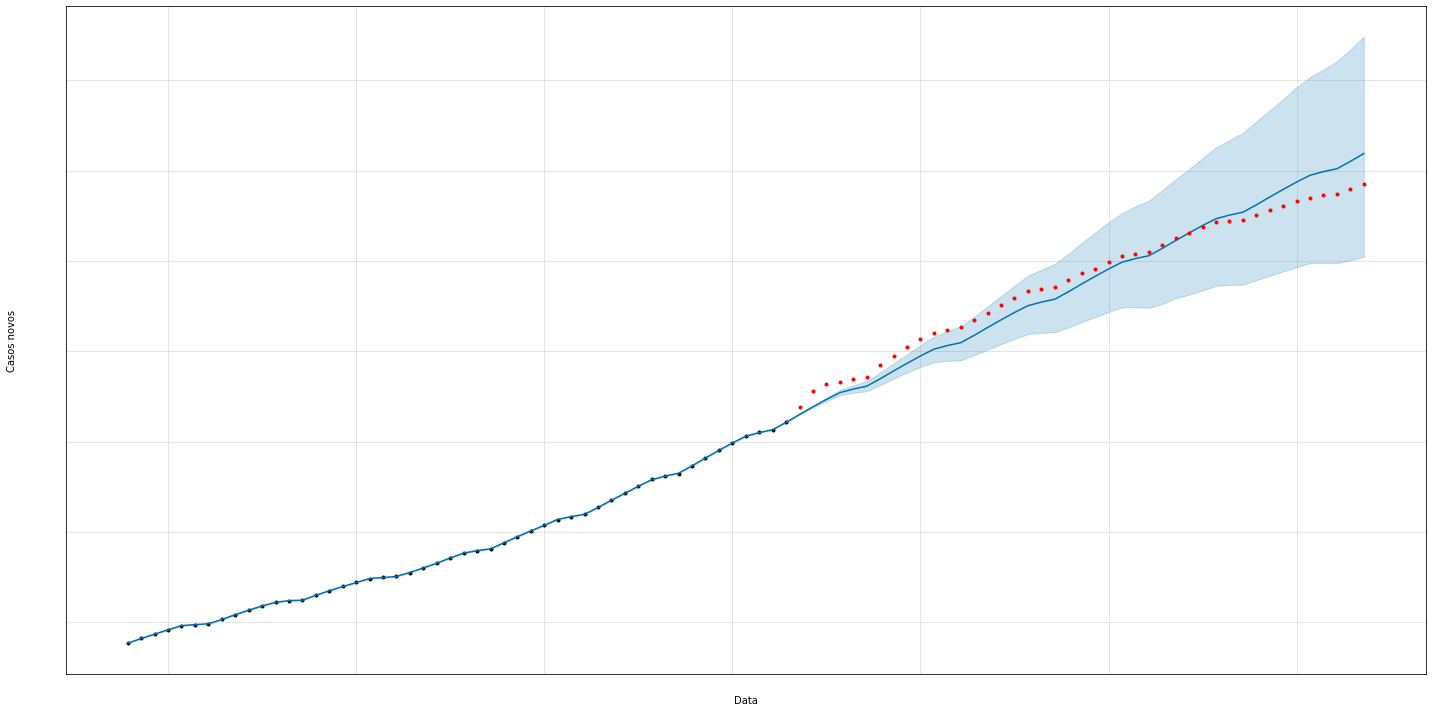

In [45]:
df = pd.DataFrame()
df['ds'] = dados_sp.datahora[350:400]
df['y'] = dados_sp.casos[350:400]
modelo = Prophet()
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=len(dados_teste))
previsao = modelo.predict(dataframefuturo)
previsao.head()
fig = modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(20,10))
plt.plot(dados_teste.ds, dados_teste.y, '.r')